In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
import pandasql as sql

In [4]:
data_train = pd.read_csv('Flight_Train.csv')

In [172]:
data_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,Train
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107,Train
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145,Train
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229,Train
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648,Train


In [5]:
data_test = pd.read_csv('Flight_Test.csv')

In [171]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,Test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,Test
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,Test
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,Test
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,Test
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,Test
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,Test
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,Test
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,Test


In [179]:
type(data_train)

pandas.core.frame.DataFrame

In [184]:
type(data_test)

pandas.core.frame.DataFrame

In [178]:
data_train.shape,data_test.shape

((10683, 12), (2671, 11))

In [183]:
Data = pd.concat(['data_train','data_test'])

TypeError: cannot concatenate object of type '<class 'str'>'; only Series and DataFrame objs are valid

In [208]:
data = data_train.append(data_test,ignore_index=True)

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_2668\3983613435.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data_train.append(data_test,ignore_index=True)


In [209]:
data.shape

(13354, 12)

In [210]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,Train
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,Train
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,Train


In [170]:
data['source'].unique()

array(['Train'], dtype=object)

In [70]:
data.isna().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
source                0
dtype: int64

In [71]:
# Duplicate check (Have missed while doing first time)

In [72]:
data.duplicated().sum()

246

In [194]:
data.drop_duplicates(inplace = True)

In [74]:
# Dropping NULL Values as only 1 null value in X columns - Route, Total Stops 

In [211]:
data.dropna(subset = ['Route','Total_Stops'],inplace = True)

In [18]:
'''data.groupby(['Source','Destination'])['Total_Stops'].agg(pd.Series.mode)'''

Source    Destination
Banglore  Delhi          non-stop
          New Delhi        1 stop
Chennai   Kolkata        non-stop
Delhi     Cochin           1 stop
Kolkata   Banglore         1 stop
Mumbai    Hyderabad      non-stop
Name: Total_Stops, dtype: object

In [191]:
'''data['Total_Stops'] = data.groupby(['Source','Destination'])['Total_Stops'].transform(lambda x: x.fillna(x.mode()[0]))'''

In [192]:
'''data['Total_Stops'].isna().sum()'''

0

In [137]:
'''data['Destination'].replace({'New Delhi':'Delhi'},inplace = True)'''

In [138]:
'''data.groupby(['Source','Destination'])['Route'].agg(pd.Series.mode)'''

Source    Destination
Banglore  Delhi                BLR ? DEL
Chennai   Kolkata              MAA ? CCU
Delhi     Cochin         DEL ? BOM ? COK
Kolkata   Banglore       CCU ? BOM ? BLR
Mumbai    Hyderabad            BOM ? HYD
Name: Route, dtype: object

In [139]:
'''data['Route'] = data.groupby(['Source','Destination'])['Route'].transform(lambda x:x.fillna(x.mode()[0]))'''

In [140]:
'''data.isna().sum()'''

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

<Axes: >

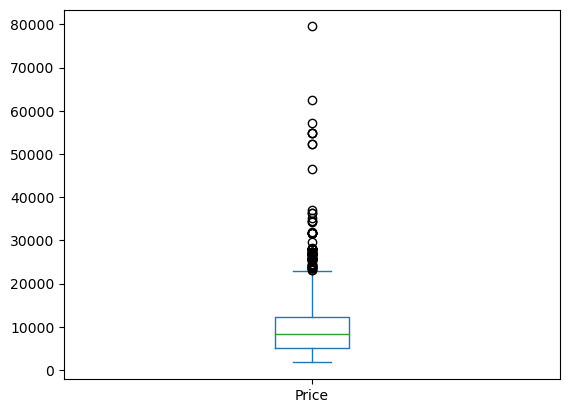

In [20]:
data.plot(kind = 'box')

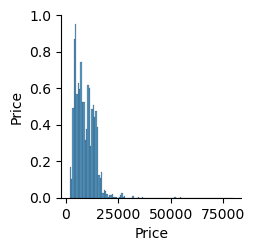

In [21]:
sns.pairplot(data)

In [141]:
data.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_20540\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price
Price,1.0


In [55]:
# All the x variables are categorical. So, we need to perform One-Hot Encoding.
# Before Encoding, feature selection needs to be done

In [56]:
# All are unique values in Airline,Source,Destination column and no replace required.

In [57]:
# Date of Journey - are all falling in same year (2019). So on a high level this column doesn't have much significance with Flight rate prediction. 
# However, we can exract month detail from Date feature by which we can identify if there is any spike in rate since any particular month.
# now, how to identfy Month from Date ?

'''
# Update from Sir :
We can extract information like weekend or weekday or public holidays from date 
'''

In [213]:
data.shape

(13353, 12)

In [214]:
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'],dayfirst = True)

In [215]:
data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
13349   2019-06-06
13350   2019-03-27
13351   2019-03-06
13352   2019-03-06
13353   2019-06-15
Name: Date_of_Journey, Length: 13353, dtype: datetime64[ns]

In [216]:
data['Day_of_Journey'] = data['Date_of_Journey'].dt.dayofweek

In [210]:
# help(data['Date_of_Journey'].dt)

Help on DatetimeProperties in module pandas.core.indexes.accessors object:

class DatetimeProperties(Properties)
 |  DatetimeProperties(data: 'Series', orig) -> 'None'
 |  
 |  Accessor object for datetimelike properties of the Series values.
 |  
 |  Examples
 |  --------
 |  >>> seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))
 |  >>> seconds_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 00:00:01
 |  2   2000-01-01 00:00:02
 |  dtype: datetime64[ns]
 |  >>> seconds_series.dt.second
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int64
 |  
 |  >>> hours_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="h"))
 |  >>> hours_series
 |  0   2000-01-01 00:00:00
 |  1   2000-01-01 01:00:00
 |  2   2000-01-01 02:00:00
 |  dtype: datetime64[ns]
 |  >>> hours_series.dt.hour
 |  0    0
 |  1    1
 |  2    2
 |  dtype: int64
 |  
 |  >>> quarters_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="q"))
 |  >>> quarters_series
 |  0   2000

In [144]:
# dt.dayofweek or dt.weekday get the day of the week as a number with Monday=0, and Sunday=6. 

In [219]:
data['Day_of_Journey'].replace({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'},inplace = True)

In [218]:
'''data.loc[data['Day_of_Journey'] > 4,'Day_of_Journey'] = 'Weekend''''

SyntaxError: unterminated string literal (detected at line 1) (3511713254.py, line 1)

In [218]:
'''data.loc[data['Day_of_Journey'] != 'Weekend','Day_of_Journey'] = 'Weekday''''

In [220]:
data['Day_of_Journey']

0           Sunday
1        Wednesday
2           Sunday
3           Sunday
4           Friday
           ...    
13349     Thursday
13350    Wednesday
13351    Wednesday
13352    Wednesday
13353     Saturday
Name: Day_of_Journey, Length: 13353, dtype: object

In [221]:
data['Date_of_Journey']

0       2019-03-24
1       2019-05-01
2       2019-06-09
3       2019-05-12
4       2019-03-01
           ...    
13349   2019-06-06
13350   2019-03-27
13351   2019-03-06
13352   2019-03-06
13353   2019-06-15
Name: Date_of_Journey, Length: 13353, dtype: datetime64[ns]

In [222]:
data['Month'] = data['Date_of_Journey'].dt.month

In [223]:
data['Month'].unique()

array([3, 5, 6, 4], dtype=int64)

In [224]:
data['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [225]:
data = data.drop(columns ='Date_of_Journey')

In [226]:
data.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train,Sunday,March
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train,Wednesday,May


In [227]:
data['Route'].nunique()

132

In [26]:
# There are 128 unique categorical value for Route. If we do One-Hot Encoding it is going to be very complex
# Also, Route can be covered under other columns : Source, Destination,Duration, Total_Stops
# So dropping Route column

In [228]:
data = data.drop(columns = 'Route')

In [88]:
# now, totally 2 columns has been dropped -  Date of Journey (replaced with month column) and Route

In [229]:
data['Duration'].nunique()

374

In [230]:
data['Duration_Min'] = (pd.to_timedelta(data['Duration']).dt.seconds // 60).astype(int)

In [231]:
data['Duration_Min'].head(2)

0    170
1    445
Name: Duration_Min, dtype: int32

In [92]:
# Successfully found a final way :)

In [232]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,Train,Sunday,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662.0,Train,Wednesday,May,445


In [73]:
# now dropping column Duration 

In [233]:
del data['Duration']

In [94]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897.0,Train,Sunday,March,170
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662.0,Train,Wednesday,May,445


In [ ]:
# - day also to be tried

In [234]:
data.loc[data['Dep_Time'] < '12:00','Dep_Time']='AM'

In [235]:
data.loc[data['Dep_Time'] != 'AM','Dep_Time']='PM'

In [236]:
data['Arrival_Time'] = data['Arrival_Time'].apply(lambda x: x.split()[0])

In [237]:
data.loc[data['Arrival_Time'] < '12:00','Arrival_Time_1']='AM'

In [238]:
data.loc[data['Arrival_Time'] != 'AM','Arrival_Time']='PM'

In [239]:
data['Additional_Info'].value_counts()

No info                         10492
In-flight meal not included      2426
No check-in baggage included      396
1 Long layover                     20
Change airports                     8
Business class                      5
No Info                             3
1 Short layover                     1
Red-eye flight                      1
2 Long layover                      1
Name: Additional_Info, dtype: int64

In [240]:
data.groupby('Additional_Info')['Price'].mean()

Additional_Info
1 Long layover                  22109.631579
1 Short layover                 26743.000000
2 Long layover                  26480.000000
Business class                  56811.250000
Change airports                 16800.714286
In-flight meal not included      9471.834511
No Info                          8044.666667
No check-in baggage included     3645.156250
No info                          9141.519295
Red-eye flight                  10873.000000
Name: Price, dtype: float64

In [241]:
data['Additional_Info'].replace({'No info':'No Info'},inplace = True)

In [242]:
data['Duration_Min'] = data['Duration_Min'].astype(int)

In [244]:
data

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min,Arrival_Time_1
0,IndiGo,Banglore,New Delhi,PM,PM,non-stop,No Info,3897.0,Train,Sunday,March,170,AM
1,Air India,Kolkata,Banglore,AM,PM,2 stops,No Info,7662.0,Train,Wednesday,May,445,NaN
2,Jet Airways,Delhi,Cochin,AM,PM,2 stops,No Info,13882.0,Train,Sunday,June,1140,AM
3,IndiGo,Kolkata,Banglore,PM,PM,1 stop,No Info,6218.0,Train,Sunday,May,325,NaN
4,IndiGo,Banglore,New Delhi,PM,PM,1 stop,No Info,13302.0,Train,Friday,March,285,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,PM,PM,1 stop,No Info,NaN,Test,Thursday,June,1435,NaN
13350,IndiGo,Kolkata,Banglore,PM,PM,non-stop,No Info,NaN,Test,Wednesday,March,155,NaN
13351,Jet Airways,Delhi,Cochin,PM,PM,1 stop,No Info,NaN,Test,Wednesday,March,395,AM
13352,Air India,Delhi,Cochin,AM,PM,1 stop,No Info,NaN,Test,Wednesday,March,915,NaN


In [245]:
data.corr()

C:\Users\janani.jayavel\AppData\Local\Temp\ipykernel_2668\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Price,Duration_Min
Price,1.000000,0.449677
Duration_Min,0.449677,1.000000


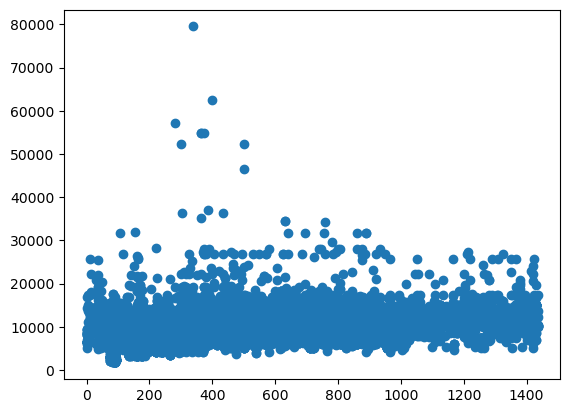

In [43]:
plt.scatter(data['Duration_Min'],data['Price'])
plt.show()

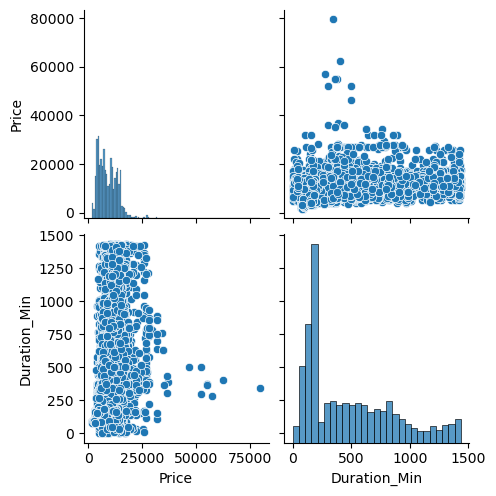

In [44]:
sns.pairplot(data)

In [45]:
# I don't find any linear relationship between dependent and numeric independent variables :( 
# so I feel linear regression may not be suitable for this prediction , but have to perform One-Hot Encoding for categorical data
# Still I am creating a model for practice :)

In [119]:
data.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,source,Day_of_Journey,Month,Duration_Min
0,IndiGo,Banglore,New Delhi,PM,PM,non-stop,No Info,3897.0,Train,Sunday,March,170
1,Air India,Kolkata,Banglore,AM,PM,2 stops,No Info,7662.0,Train,Wednesday,May,445


In [ ]:
# Fixed All columns and removed only Route column

In [248]:
data_cat = data.select_dtypes(exclude = np.number)

In [252]:
data_cat.columns

Index(['Airline', 'Source', 'Destination', 'Dep_Time', 'Arrival_Time',
       'Total_Stops', 'Additional_Info', 'source', 'Day_of_Journey', 'Month'],
      dtype='object')

In [253]:
data_cat.drop(columns = 'source')

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Day_of_Journey,Month
0,IndiGo,Banglore,New Delhi,PM,PM,non-stop,No Info,Sunday,March
1,Air India,Kolkata,Banglore,AM,PM,2 stops,No Info,Wednesday,May
2,Jet Airways,Delhi,Cochin,AM,PM,2 stops,No Info,Sunday,June
3,IndiGo,Kolkata,Banglore,PM,PM,1 stop,No Info,Sunday,May
4,IndiGo,Banglore,New Delhi,PM,PM,1 stop,No Info,Friday,March
...,...,...,...,...,...,...,...,...,...
13349,Air India,Kolkata,Banglore,PM,PM,1 stop,No Info,Thursday,June
13350,IndiGo,Kolkata,Banglore,PM,PM,non-stop,No Info,Wednesday,March
13351,Jet Airways,Delhi,Cochin,PM,PM,1 stop,No Info,Wednesday,March
13352,Air India,Delhi,Cochin,AM,PM,1 stop,No Info,Wednesday,March


In [254]:
data_cat = pd.get_dummies(data_cat)

In [255]:
data_cat = data_cat.reset_index().drop(columns = 'index')

In [256]:
data_num = data.select_dtypes(include = np.number)

In [257]:
data_num = data_num.reset_index().drop(columns = 'index')

In [258]:
data_source = data['source'].reset_index().drop(columns = 'index')

In [259]:
data_preprocessed = pd.concat([data_cat,data_num,data_source],axis = 1)

In [260]:
data_preprocessed.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Day_of_Journey_Thursday,Day_of_Journey_Tuesday,Day_of_Journey_Wednesday,Month_April,Month_June,Month_March,Month_May,Price,Duration_Min,source
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3897.0,170,Train
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,7662.0,445,Train


In [322]:
data_preprocessed_train = data_preprocessed[data_preprocessed['source']=='Train']

In [340]:
data_preprocessed_train_x = data_preprocessed_train.drop(columns = ['Price'])

In [341]:
data_preprocessed_train_x = data_preprocessed_train_x.drop(columns = ['source'])

In [342]:
data_preprocessed_train_x.shape

(10682, 54)

In [343]:
data_preprocessed_train_x.columns

Index(['Airline_Air Asia', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Banglore', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata',
       'Source_Mumbai', 'Destination_Banglore', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi', 'Dep_Time_AM', 'Dep_Time_PM',
       'Arrival_Time_PM', 'Total_Stops_1 stop', 'Total_Stops_2 stops',
       'Total_Stops_3 stops', 'Total_Stops_4 stops', 'Total_Stops_non-stop',
       'Additional_Info_1 Long layover', 'Additional_Info_1 Short layover',
       'Additional_Info_2 Long layover', 'Additional_Info_Business class',
       'Additional_Info_Change airports',
       'Additional_Info_In-flight meal no

In [344]:
data_preprocessed_train_y = data_preprocessed_train['Price']

In [271]:
Poly = PolynomialFeatures(degree = 2, include_bias=False)

In [273]:
data_train_poly_x = Poly.fit_transform(data_train_x)

In [335]:
reg_train = LinearRegression()

In [346]:
reg_train.fit(data_preprocessed_train_x,data_preprocessed_train_y)

LinearRegression()

In [347]:
reg_train.intercept_  #18291317294225.105

18291317294225.105

In [348]:
reg_train.coef_

array([-1.82913173e+13, -1.82913173e+13, -1.82913173e+13, -1.82913173e+13,
       -1.82913173e+13, -1.82913172e+13, -1.82913173e+13, -1.82913173e+13,
       -1.82913173e+13, -1.82913173e+13, -1.82913173e+13, -1.82913173e+13,
        3.45233398e+02,  9.51831055e+01,  1.39497070e+02,  1.12207031e+02,
       -6.87220703e+02,  1.12398438e+02,  1.44334961e+02, -3.80996094e+02,
       -6.86044434e+02,  9.47221680e+01,  7.15654297e+02, -1.10328125e+02,
        1.10509766e+02,  1.95312500e-02, -8.02564453e+02,  1.05945801e+03,
        2.38410657e+03,  1.55225691e+03, -4.19327246e+03,  1.74401709e+03,
        7.01582478e+03,  6.87337131e+03,  8.85576813e+03, -2.44144495e+03,
       -9.13250342e+03, -5.45260010e+03, -5.58834424e+03, -1.87447247e+03,
        0.00000000e+00,  0.00000000e+00,  1.15855078e+03, -3.17318359e+02,
        5.67781982e+01,  2.74402222e+02, -7.23300537e+02, -1.68530884e+02,
       -2.80539307e+02, -9.17597656e+02, -1.73475586e+02,  1.10188965e+03,
       -1.05859375e+01,  

In [349]:
data_train_predict = reg_train.predict(data_preprocessed_train_x)

In [350]:
data_train_predict

array([ 6675.78515625, 10815.7578125 , 15618.78515625, ...,
        8922.52734375,  9235.77734375, 10441.515625  ])

In [353]:
data_preprocessed_test_x = data_preprocessed_test.drop(columns = ['source'])

In [354]:
data_preprocessed_test_x = data_preprocessed_test_x.drop(columns = ['Price'])

In [355]:
data_preprocessed_train_x.shape

(10682, 54)

In [356]:
data_preprocessed_test_x.shape

(2671, 54)

In [357]:
data_test_predict = reg_train.predict(data_preprocessed_test_x)

In [366]:
data_test_predict = pd.Series(data_test_predict)

In [359]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,source
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,Test
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,Test


In [361]:
data_test = data_test.drop(columns = 'source')

In [367]:
data_result = pd.concat([data_test,data_test_predict],axis = 1)

In [368]:
data_result.to_csv('Price_result.csv',index= False)

##### ***************** Ignore the Below  ******************

In [351]:
residual = data_preprocessed_train_y - data_train_predict

<Axes: xlabel='Price', ylabel='Density'>

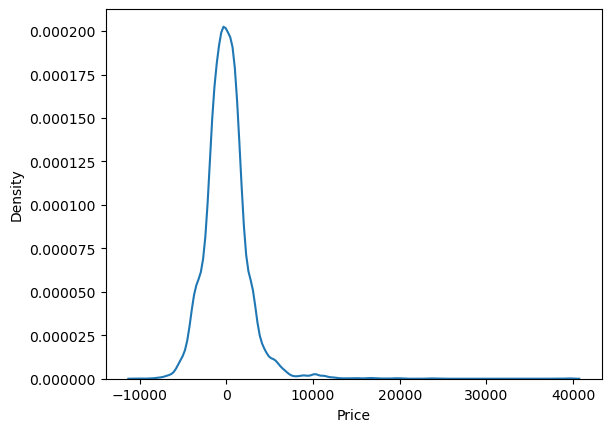

In [352]:
sns.kdeplot(residual)

In [362]:
def Error_Metrics(actual,predicted) :
    mse = mean_squared_error(actual,predicted)
    rmse = np.sqrt(mean_squared_error(actual,predicted))
    mae = mean_absolute_error(actual,predicted)
    mape = mean_absolute_percentage_error(actual,predicted)
    r2 = r2_score(actual,predicted)
    print("mse :",mse,"\nrmse:",rmse,"\nmae",mae,"\nmape",mape,"\nr-score",r2 )

In [65]:
'''Error Metrics Of Train Data
mse: 6634402.852153334 
rmse: 2575.7334590662394 
mae: 1743.6243845178965 
mape: 0.2116500228092523 
R-Score: 0.6879784466251699
-------------------------------
Error Metrics of Train Data:
mse : 6593625.777990432 
rmse: 2567.805634776595 
mae 1735.3847616028386 
mape 0.21113045295607233 
r-score 0.6898962267639295
-------------------------------
Error Metrics of Train Data:
mse : 6362282.54928913 
rmse: 2522.356546820677 
mae 1739.5909126480294 
mape 0.21397353008177708 
r-score 0.7008011007780626
'''

'Error Metrics Of Train Data\nmse: 6634402.852153334 \nrmse: 2575.7334590662394 \nmae: 1743.6243845178965 \nmape: 0.2116500228092523 \nR-Score: 0.6879784466251699'

In [363]:
print("Error Metrics of Train Data:")
Error_Metrics(data_preprocessed_train_y,data_train_predict)

Error Metrics of Train Data:
mse : 6362282.54928913 
rmse: 2522.356546820677 
mae 1739.5909126480294 
mape 0.21397353008177708 
r-score 0.7008011007780626


## Test Price Prediction 

In [276]:
data_preprocessed_test = data_preprocessed[data_preprocessed['source']=='Test']

In [279]:
data_preprocessed_test_x = data_preprocessed_test.drop(columns = 'Price')

In [282]:
data_preprocessed_test_x = data_preprocessed_test_x.drop(columns = 'source')

In [294]:
reg_test = LinearRegression()

In [299]:
reg_test.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

In [298]:
data_test_predict =reg_test.predict(data_preprocessed_test_x)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

## Working on Test data 

In [269]:
data_test = pd.read_csv('Flight_Test.csv')

In [270]:
data_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [68]:
data_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [122]:
# super no null values :)

In [69]:
data_test['Destination'].replace({'New Delhi':'Delhi'},inplace = True)

In [70]:
data_test['Date_of_Journey'] = pd.to_datetime(data_test['Date_of_Journey'],dayfirst = True)

In [71]:
data_test['Month'] = data_test['Date_of_Journey'].dt.month

In [72]:
data_test['Month'].replace({3:'March',4:'April',5:'May',6:'June'},inplace = True)

In [73]:
data_test['Day_of_Journey'] = data_test['Date_of_Journey'].dt.dayofweek

In [74]:
data_test.loc[data_test['Day_of_Journey'] > 4,'Day_of_Journey'] = 'Weekend'

In [75]:
data_test.loc[data_test['Day_of_Journey'] != 'Weekend','Day_of_Journey'] = 'Weekday'

In [76]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day_of_Journey
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,June,Weekday
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,May,Weekend


In [77]:
data_test['Arrival_Time'] = data_test['Arrival_Time'].apply(lambda x: x.split()[0])

In [78]:
data_test.loc[data_test['Dep_Time'] < '12:00','Dep_Time']='AM'

In [79]:
data_test.loc[data_test['Dep_Time'] != 'AM','Dep_Time']='PM'

In [80]:
data_test.loc[data_test['Arrival_Time'] < '12:00','Arrival_Time']='AM'

In [81]:
data_test.loc[data_test['Arrival_Time'] != 'AM','Arrival_Time']='PM'

In [82]:
data_test.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Month,Day_of_Journey
0,Jet Airways,2019-06-06,Delhi,Cochin,DEL ? BOM ? COK,PM,AM,10h 55m,1 stop,No info,June,Weekday
1,IndiGo,2019-05-12,Kolkata,Banglore,CCU ? MAA ? BLR,AM,AM,4h,1 stop,No info,May,Weekend


In [83]:
del data_test['Date_of_Journey']

In [84]:
del data_test['Route']

In [85]:
data_test['Duration_Min'] = (pd.to_timedelta(data_test['Duration']).dt.seconds // 60).astype(int)

In [86]:
data_test = data_test.drop(columns = 'Duration')

In [87]:
data_test.head(2)

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Month,Day_of_Journey,Duration_Min
0,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,June,Weekday,655
1,IndiGo,Kolkata,Banglore,AM,AM,1 stop,No info,May,Weekend,240


In [ ]:
# Price column is not given in test data. Ideally, we need to predict the Price


In [88]:
data_test_cat = data_test.select_dtypes(exclude = np.number)

In [89]:
data_test_cat

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Month,Day_of_Journey
0,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,June,Weekday
1,IndiGo,Kolkata,Banglore,AM,AM,1 stop,No info,May,Weekend
2,Jet Airways,Delhi,Cochin,PM,PM,1 stop,In-flight meal not included,May,Weekday
3,Multiple carriers,Delhi,Cochin,AM,PM,1 stop,No info,May,Weekday
4,Air Asia,Banglore,Delhi,PM,AM,non-stop,No info,June,Weekday
...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,PM,PM,1 stop,No info,June,Weekday
2667,IndiGo,Kolkata,Banglore,PM,PM,non-stop,No info,March,Weekday
2668,Jet Airways,Delhi,Cochin,PM,AM,1 stop,No info,March,Weekday
2669,Air India,Delhi,Cochin,AM,PM,1 stop,No info,March,Weekday


In [90]:
data_test_cat = pd.get_dummies(data_test_cat)

In [91]:
data_test_cat = data_test_cat.reindex(columns=data_cat.columns).fillna(0)

In [92]:
data_test_cat.shape

(2671, 46)

In [93]:
data_cat.shape

(10683, 46)

In [ ]:
#Hurray! both the columns matched :D

In [94]:
data_test['Duration_Min'] = data_test['Duration_Min'].astype('int')

In [95]:
data_test_num = data_test.select_dtypes(include = np.number)

In [96]:
data_test_cat = data_test_cat.reset_index().drop(columns = 'index')

In [97]:
data_test_num = data_test_num.reset_index().drop(columns = 'index')

In [98]:
data_test = pd.concat([data_test_cat,data_test_num],axis = 1)

In [99]:
data_test.head(2)

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_Red-eye flight,Day_of_Journey_Weekday,Day_of_Journey_Weekend,Month_April,Month_June,Month_March,Month_May,Duration_Min
0,0,0,0,0,1,0,0,0,0,0.0,...,0.0,0,0.0,1,0,0,1,0,0,655
1,0,0,0,1,0,0,0,0,0,0.0,...,0.0,0,0.0,0,1,0,0,0,1,240


In [100]:
data_train_x.shape

(10683, 47)

In [101]:
# now, i dont have my y or dependent value - so i cannot fit.

In [112]:
test_predict = reg.predict(data_test) 

In [ ]:
# can't predict residual as we don't have test_y (Price)

In [113]:
test_predict

array([19633.796875  , 14415.69140625,  9800.91210938, ...,
       21256.33007812, 16862.07226562, 17255.1796875 ])

In [115]:
test_predict = pd.Series(test_predict)

In [119]:
test_predict

0       19633.796875
1       14415.691406
2        9800.912109
3       17124.205078
4       10394.859375
            ...     
2666    15674.695312
2667    11927.681641
2668    21256.330078
2669    16862.072266
2670    17255.179688
Length: 2671, dtype: float64

In [118]:
test_predict.to_csv('Flight_Price_Predicted.csv',index = False)

In [121]:
data_test_dum = pd.read_csv('Flight_Test.csv')

In [122]:
test_predict = pd.DataFrame(test_predict)

In [123]:
test_predict['Price']= test_predict

In [124]:
test_predict = test_predict.drop(columns = [0])

In [125]:
data_test_predict = pd.concat([data_test_dum,test_predict],axis = 1)

In [126]:
data_test_predict

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,19633.796875
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info,14415.691406
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9800.912109
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info,17124.205078
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,10394.859375
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,15674.695312
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,11927.681641
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,21256.330078
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,16862.072266


In [127]:
data_test_predict.to_csv('Result.csv',index= False)

In [ ]:
### now comparing few test data with train data below to see the accuracy of the model prediction

In [109]:
data_ = pd.read_csv('Flight_Train.csv')

In [110]:
q1 = "select * from data_ where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [111]:
sql.sqldf(q1,locals())

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,27/03/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 28 Mar,10h 55m,1 stop,In-flight meal not included,6540
1,Jet Airways,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 16 Jun,10h 55m,1 stop,In-flight meal not included,10262
2,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,In-flight meal not included,10262
3,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 22 May,10h 55m,1 stop,In-flight meal not included,12898
4,Jet Airways,18/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 19 May,10h 55m,1 stop,In-flight meal not included,12373
5,Jet Airways,3/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 04 Jun,10h 55m,1 stop,No info,14714
6,Jet Airways,3/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 04 Jun,10h 55m,1 stop,In-flight meal not included,10262
7,Jet Airways,21/03/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 22 Mar,10h 55m,1 stop,No info,12557
8,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 10 May,10h 55m,1 stop,In-flight meal not included,12373
9,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 10 Jun,10h 55m,1 stop,In-flight meal not included,10262


In [ ]:
# 16 rows with the given specification is found in Train Data , so trying to take a mean of it :)

In [228]:
q1 = "select Price from data_ where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [229]:
sql.sqldf(q1,locals()).sum()

Price    185606
dtype: int64

In [230]:
185606/16

11600.375

In [ ]:
''' Actual Average Price from all the 16 Train data with Airlin = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 11600.375''' 

In [ ]:
# now am taking average price from Test with same condition :)


In [231]:
q1 = "select Price from data_test_predict where Airline = 'Jet Airways' and Source= 'Delhi' and Destination ='Cochin' and Total_Stops = '1 stop'and Duration = '10h 55m' and Route = 'DEL ? BOM ? COK'"

In [232]:
sql.sqldf(q1,locals()).sum()

Price    50306.40918
dtype: float64

In [235]:
50306.40918/3

16768.803060000002

In [ ]:
''' Actual Average Price from all the 16 Train data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 11600.375''' 

In [ ]:
''' Predicted Average Price from all the 3 Test data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 16768.803060000002
'''

In [ ]:
# Model completed

In [ ]:
# Doubt :

In [ ]:
'''
Predicted Average Price from all the 3 Test data with Airline = Jet Airways from Delhi to cochin with 1 stop
and Duration 10h 55m and Route = DEL ? BOM ? COK is ---> 10417.5
(without Airlines,Additional Info,Dep_Time, Arrival_Time columns)
''' 